In [1]:
import numpy as np
from tensorflow import keras


In [3]:
# 回归任务的目标值是一个连续区间任意数值.比如预测股票价格, 预测房价, 预测温度值..
from sklearn.datasets import fetch_california_housing

In [5]:
housing = fetch_california_housing()

In [6]:
type(housing)

sklearn.utils.Bunch

In [7]:
housing

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n\nCalifornia Housing dataset\n--------------------

In [8]:
data = housing.data
target = housing.target

In [9]:
print(housing.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block
        - HouseAge      median house age in block
        - AveRooms      average number of rooms
        - AveBedrms     average number of bedrooms
        - Population    block population
        - AveOccup      average house occupancy
        - Latitude      house block latitude
        - Longitude     house block longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
http://lib.stat.cmu.edu/datasets/

The target variable is the median house value for California districts.

This dataset was derived from the 1990 U.S. census, using one row per census
block group. A block group is the smallest geographical unit for which the U.S.
Census Bur

In [10]:
from sklearn.datasets import load_boston

In [11]:
load_boston()

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [12]:
from sklearn.model_selection import train_test_split

x_train_all, x_test, y_train_all, y_test = train_test_split(data, target, random_state=7)
x_train, x_valid, y_train, y_valid = train_test_split(x_train_all, y_train_all, random_state=10)
print(x_train.shape, y_train.shape)
print(x_valid.shape, y_valid.shape)
print(x_test.shape, y_test.shape)

(11610, 8) (11610,)
(3870, 8) (3870,)
(5160, 8) (5160,)


In [13]:
x_train[:10]

array([[ 3.42310000e+00,  6.00000000e+00,  4.71142857e+00,
         1.05428571e+00,  7.32000000e+02,  2.09142857e+00,
         3.80000000e+01, -1.21350000e+02],
       [ 1.26670000e+00,  7.00000000e+00,  3.32624113e+00,
         1.05319149e+00,  1.18700000e+03,  4.20921986e+00,
         3.25400000e+01, -1.17040000e+02],
       [ 1.39290000e+00,  5.20000000e+01,  5.00000000e+00,
         9.53488372e-01,  1.26000000e+02,  2.93023256e+00,
         3.79200000e+01, -1.22360000e+02],
       [ 2.63640000e+00,  3.90000000e+01,  3.57777778e+00,
         9.11111111e-01,  3.19000000e+02,  3.54444444e+00,
         3.40100000e+01, -1.18180000e+02],
       [ 2.56820000e+00,  5.20000000e+01,  4.50000000e+00,
         1.12264151e+00,  2.18000000e+02,  2.05660377e+00,
         3.78500000e+01, -1.22290000e+02],
       [ 8.73640000e+00,  2.30000000e+01,  7.28311258e+00,
         1.21274834e+00,  2.75000000e+03,  2.27649007e+00,
         3.40200000e+01, -1.18660000e+02],
       [ 4.52210000e+00,  1.600000

In [20]:
y_train[:10]

array([1.238  , 0.675  , 1.042  , 1.488  , 1.2    , 5.00001, 1.683  ,
       1.023  , 1.288  , 2.75   ])

In [14]:
import pandas as pd

In [16]:
df = pd.DataFrame(x_train, columns=housing.feature_names)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11610 entries, 0 to 11609
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      11610 non-null  float64
 1   HouseAge    11610 non-null  float64
 2   AveRooms    11610 non-null  float64
 3   AveBedrms   11610 non-null  float64
 4   Population  11610 non-null  float64
 5   AveOccup    11610 non-null  float64
 6   Latitude    11610 non-null  float64
 7   Longitude   11610 non-null  float64
dtypes: float64(8)
memory usage: 725.8 KB


In [18]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,11610.000000,11610.000000,11610.000000,11610.000000,11610.000000,11610.000000,11610.000000,11610.000000
mean,3.849622,28.672093,5.433468,1.100115,1430.323170,3.063673,35.650221,-119.589140
std,1.873817,12.580254,2.786144,0.548182,1166.870676,7.645761,2.135333,1.997227
min,0.499900,1.000000,0.846154,0.333333,5.000000,1.066176,32.540000,-124.350000
25%,2.562500,18.000000,4.426587,1.006428,790.000000,2.431696,33.940000,-121.810000
50%,3.525000,29.000000,5.223940,1.049261,1167.000000,2.813165,34.260000,-118.520000
75%,4.719300,37.000000,6.029486,1.099153,1733.750000,3.282670,37.720000,-118.020000
max,15.000100,52.000000,141.909091,34.066667,35682.000000,599.714286,41.950000,-114.310000


In [21]:
# 标准化处理
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)

x_valid_scaled = scaler.transform(x_valid)
x_test_scaled = scaler.transform(x_test)

In [22]:
x_train.shape[-1]

8

In [24]:
x_train.shape[1:]

(8,)

In [36]:
# 定义网络
model = keras.models.Sequential([
    keras.layers.Dense(32, activation='relu', input_shape=x_train.shape[1:]),
    keras.layers.Dense(1)
])

In [26]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                288       
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                                 
Total params: 321
Trainable params: 321
Non-trainable params: 0
_________________________________________________________________


In [37]:
model.compile(loss='mean_squared_error', optimizer='sgd', metrics=['mse'])

In [38]:
history = model.fit(x_train_scaled, y_train, batch_size=64, epochs=20, validation_data=(x_valid_scaled, y_valid))

Epoch 1/20
182/182 [==============================] - 1s 5ms/step - loss: 1.3969 - mse: 1.3969 - val_loss: 0.6048 - val_mse: 0.6048
Epoch 2/20
182/182 [==============================] - 1s 3ms/step - loss: 0.5729 - mse: 0.5729 - val_loss: 0.5158 - val_mse: 0.5158
Epoch 3/20
182/182 [==============================] - 1s 3ms/step - loss: 0.5209 - mse: 0.5209 - val_loss: 0.4823 - val_mse: 0.4823
Epoch 4/20
182/182 [==============================] - 1s 3ms/step - loss: 0.4974 - mse: 0.4974 - val_loss: 0.4607 - val_mse: 0.4607
Epoch 5/20
182/182 [==============================] - 1s 3ms/step - loss: 0.4799 - mse: 0.4799 - val_loss: 0.4434 - val_mse: 0.4434
Epoch 6/20
182/182 [==============================] - 1s 3ms/step - loss: 0.4627 - mse: 0.4627 - val_loss: 0.4346 - val_mse: 0.4346
Epoch 7/20
182/182 [==============================] - 1s 3ms/step - loss: 0.4565 - mse: 0.4565 - val_loss: 0.4242 - val_mse: 0.4242
Epoch 8/20
182/182 [==============================] - 1s 3ms/step - loss: 0.

<AxesSubplot:>

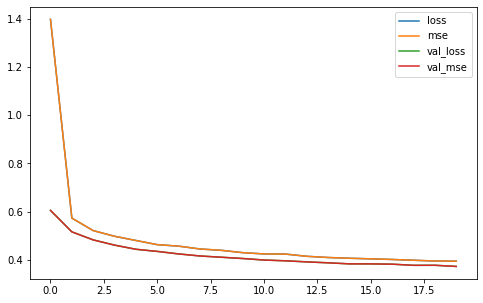

In [39]:
pd.DataFrame(history.history).plot(figsize=(8, 5))

In [40]:
# 数据分布不一样, 差距特别大. 
model.evaluate(x_test, y_test)

162/162 [==============================] - 1s 3ms/step - loss: 27937.0488 - mse: 27937.0488


[27937.048828125, 27937.048828125]

In [41]:
model.evaluate(x_test_scaled, y_test)

162/162 [==============================] - 1s 3ms/step - loss: 0.4067 - mse: 0.4067


[0.40673789381980896, 0.40673789381980896]